# introduction 
### This data set includes information about individual rides made in a bike-sharing system . 

# Questions that we try to answer through our analysis:
* Q1) <a href='#q1'> what is proportion of male and female ?</a>
* Q2)  <a href='#q2'>what is proportion of member type ? </a>
* Q3) <a href='#q3'> number of subscirbers and sex ? </a>
* Q4) <a href='#q4'> Distribution of trip duration ? </a>
* Q5)  <a href='#q5'>Is there a relationship between driving time and age  ? </a>
* Q6)  <a href='#q6'>averge duration rate  </a>
* Q7) <a href='#q7'> Is there a relationship between riding time and gender? </a>
* Q8) <a href='#q8'> What is the ratio of sex to bike riding time ?</a>
* Q9) <a href='#q9'>Is there a relationship between riding time , age and  gender? </a>
* Q10) <a href='#q10'> The top highest days making bike trips</a>
* Q11) <a href='#q11'> what is most important and used stations ? </a>
* 12) <a href='#summary'>Summary </a>

In [1]:
# import libs
import pandas as pd 
import requests
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# Data wrangling 

In [2]:
#load data
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.tail(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [4]:
df.shape

(183412, 16)

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#check null values 
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# it's clear that there are missing values dropping them doesn't affects on our analysis , we still have more than 174k fully correct rows 

In [8]:
#dropping null values 
df.dropna(inplace=True)

In [9]:
#check duplicated values 
df.duplicated().sum()


0

In [10]:
# there is no dublicateed values 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

## cleaning columns 
* ### duaration should be by minute to be readable 
* ###  time cols should be by datetime  , 
* ### ids and birthday year  should convert to interger 
* ### we must convert start time and end  time to datetime 


In [12]:
df['start_time']=df['start_time'].astype('datetime64')

In [13]:
df['end_time']=df['end_time'].astype('datetime64')

In [14]:
df['duration_sec']=df['duration_sec'].apply(lambda  x : x/60).astype(int)
df.rename(columns={'duration_sec':'duration_min'}, inplace=True)

In [15]:
intcol=['end_station_id','start_station_id','member_birth_year']
for col in intcol:
    df[col]=df[col].astype('int64')

    


In [16]:
df['year']=pd.DatetimeIndex(df['start_time']).year


In [17]:
df['day']=pd.DatetimeIndex(df['start_time']).day


In [18]:
# get age of bike riders by subtract from 2019 , year where person have a trip 
df['age']=abs(df['member_birth_year']-2019)

In [19]:
df.shape

(174952, 19)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             174952 non-null  int32         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int64         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [21]:
df.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,day,age
0,869,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2019,28,35
2,1030,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2019,28,47
3,608,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2019,28,30
4,26,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019,28,45
5,29,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,2019,28,60


# Exploratory

In [22]:
# dropping unwanted columns which does not join in our analysis

In [23]:
df.drop(['bike_share_for_all_trip','bike_id','end_station_longitude','end_station_latitude','start_station_longitude','start_station_latitude'],inplace=True,axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_min        174952 non-null  int32         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_id    174952 non-null  int64         
 4   start_station_name  174952 non-null  object        
 5   end_station_id      174952 non-null  int64         
 6   end_station_name    174952 non-null  object        
 7   user_type           174952 non-null  object        
 8   member_birth_year   174952 non-null  int64         
 9   member_gender       174952 non-null  object        
 10  year                174952 non-null  int64         
 11  day                 174952 non-null  int64         
 12  age                 174952 non-null  int64         
dtypes: datetime64[ns](2), int32(1

In [1]:
#note after data manipulation , memory usage has decreased to 18 MB

In [26]:
df.tail(2)

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,year,day,age
183410,2,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,216,San Pablo Ave at 27th St,Subscriber,1988,Male,2019,1,31
183411,4,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24,Spear St at Folsom St,37,2nd St at Folsom St,Subscriber,1989,Male,2019,1,30


## <div id="q1"> Q1) what is proportion of male and female ?</div>


Text(0.5, 1.5, ' Donut plot shows percent of member by  gender')

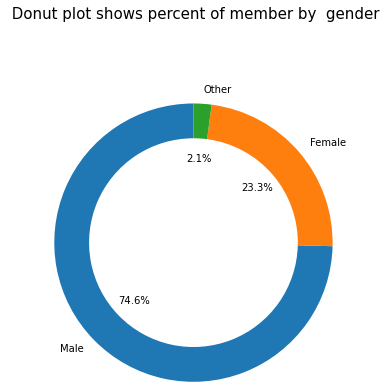

In [27]:
count=df['member_gender'].value_counts()
ax=plt.pie(count,labels=count.index,radius=1.6,startangle=90,autopct = '%1.1f%%',wedgeprops={'width':0.4})
plt.title(' Donut plot shows percent of member by  gender',y=1.5,size=15,color='black')


### it clear that male represents largest proportion, then female 


## <div id="q2">Q2)  what is proportion of member type ? </div>

Text(0.5, 1.5, ' Donut plot shows percent of member by  member type')

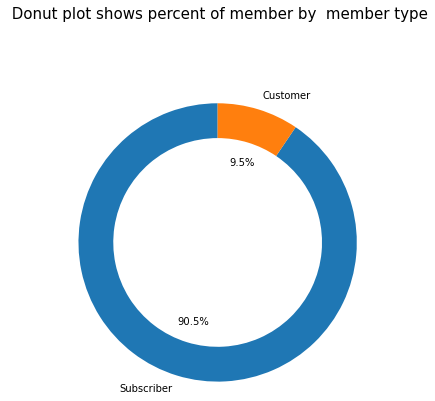

In [28]:
count=df['user_type'].value_counts()
ax=plt.pie(count,labels=count.index,radius=1.6,startangle=90,autopct = '%1.1f%%',wedgeprops={'width':0.4})
plt.title(' Donut plot shows percent of member by  member type',y=1.5,size=15,color='black')


### we notice that subscribers represents largest proportion
### most people who  loves  riding bikes are subscribers 

##  <div id="q3">Q3 )  number  of subscirbers and sex ? </div>

In [29]:
# crosstab to get client by sex .
t=pd.crosstab(df.member_gender,df.user_type)
t

user_type,Customer,Subscriber
member_gender,,
Female,4623,36182
Male,11493,119007
Other,450,3197


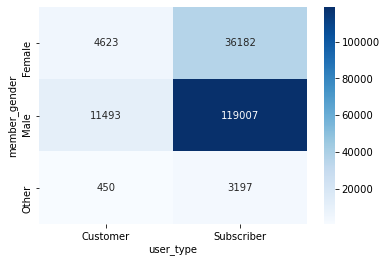

In [30]:
# plot heatmap 
ax=sb.heatmap(t,cmap='Blues',annot=True,fmt='1.0f')

### heatmap shows distribution of client by sex 
### we notice that Male subscriber is the Most one

In [31]:
df.head(2)

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,year,day,age
0,869,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,2019,28,35
2,1030,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,2019,28,47


##  <div id="q4">4) Distribution of trip duration  </div>


(1.0, 60.0)

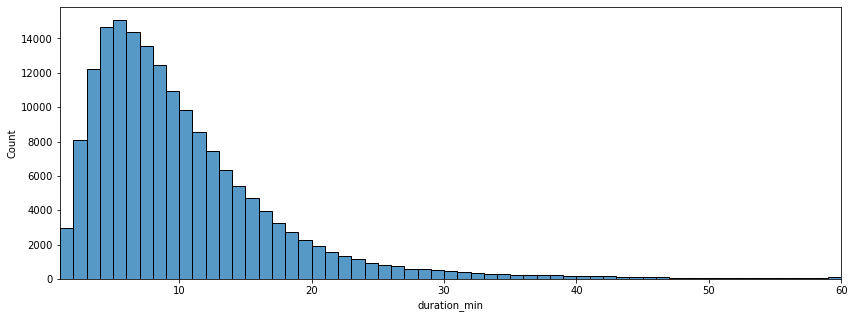

In [72]:
plt.gcf().set_size_inches(14,5)
bins=np.arange(1,60+1,1)
ax=sb.histplot(df.duration_min,bins=bins)
ax.set_xlim(1,60)
ax.set_title("histogram shows distrbuiton of duration by minute")

### it represent Right skewed , positive skew , increasing of duration decrease counts

## <div id="q5"> Q5)  Is there a relationship between driving time and age  ?</div>

Text(0.5, 1.0, 'scatter plot show correlation between age and ride duration time ')

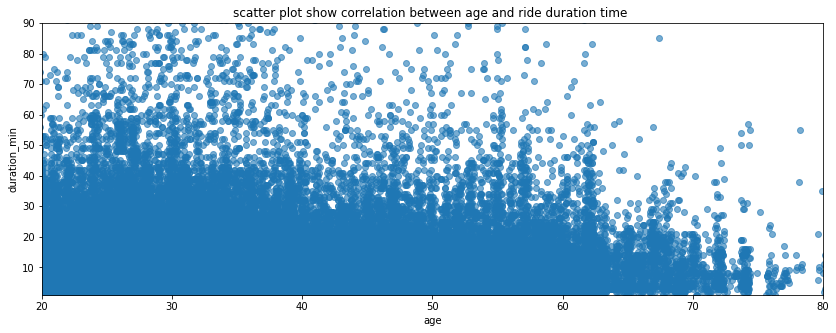

In [33]:
plt.gcf().set_size_inches(14,5)

ax=sb.regplot(data=df,y='duration_min',x='age',fit_reg=False,x_jitter=0.4,scatter_kws={"alpha":0.6})
ax.set_xlim(20,80)
ax.set_ylim(1,90)
ax.set_title("scatter plot show correlation between age and ride duration time ")

#### it's clear that  duration time does not depend on age although we could say 
#### that people in twenty until forty have ability to make long duration bike ride time ,
#### most  people prefers ride  trip less than one hour .

## <div id="q6"> 6) averge duration rate  </div>

In [34]:
## How long does the average trip take?
df.duration_min.mean()



11.241460514884082

##  averge duration rate  about `11` minutes

#####  <span style="color:white"> It's clear that male sex have ability to do long ride  duration time </span>

In [35]:
### we took 3k from each age to expect relation betwwen third types and other factor 

In [36]:
g1 = df.groupby( "member_gender")['duration_min','member_gender','age']
g1.groups.keys()

<ipython-input-36-7cc06804721e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g1 = df.groupby( "member_gender")['duration_min','member_gender','age']


dict_keys(['Female', 'Male', 'Other'])

In [37]:
df_Male=g1.get_group('Male')
df_Female=g1.get_group('Female')
df_Other=g1.get_group('Other')


In [38]:
df_Male1=df_Male.iloc[0:3000]
df_Female1=df_Female.iloc[0:3000]
df_Other1=df_Other[0:3000]

In [39]:
df_Male1.shape

(3000, 3)

In [40]:
df_Male1.head(2)

,duration_min,member_gender,age
0,869,Male,35
2,1030,Male,47


In [41]:
sexgroup = pd.concat([df_Other1, df_Female1,df_Male1], axis=0,ignore_index=True)


In [42]:
sexgroup.head(4)

,duration_min,member_gender,age
0,608,Other,30
1,26,Other,31
2,19,Other,26
3,9,Other,28


In [43]:
sexgroup.member_gender.value_counts()

Other     3000
Male      3000
Female    3000
Name: member_gender, dtype: int64

## <div id="q8">  Q7)Is there a relationship between riding time and gender? </div>

Text(0.5, 1.0, 'box plot shows relation between duration time and gender ')

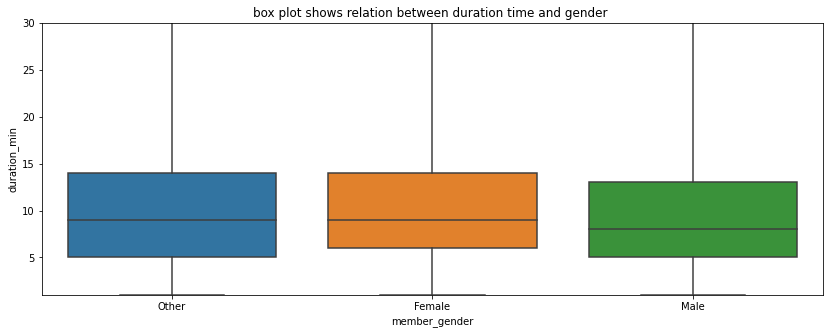

In [44]:
plt.gcf().set_size_inches(14,5)

ax=sb.boxplot(data=sexgroup,y='duration_min',x='member_gender',whis=3)
#ax.set_xlim(20,80)
ax.set_ylim(1,30)
ax.set_title("box plot shows relation between duration time and gender ")

##  Other and Female median almost same and male lower a bit

### <div id="q8"> Q8)  What is the ratio of sex to bike riding time ? </div>

Text(0.5, 1.0, 'hist plot show proportion between member_gender and ride duration time ')

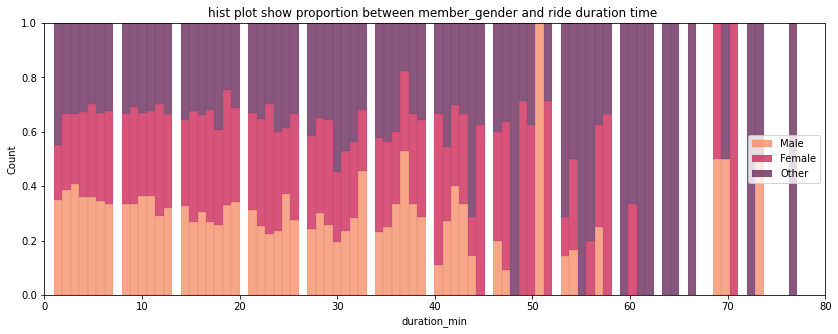

In [45]:
plt.gcf().set_size_inches(14,5)
ax=sb.histplot(x='duration_min',data=sexgroup,hue='member_gender',multiple='fill',palette='rocket');
ax.legend(loc=5,labels=['Male','Female','Other'])
ax.set_xlim(0,80)
ax.set_title("hist plot show proportion between member_gender and ride duration time ")

### we notice that female perfer short time  boke riding   rather than Male and Others

(0.0, 60.0)

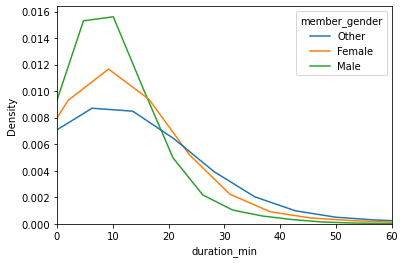

In [46]:
ax=sb.kdeplot(x='duration_min',data=sexgroup,hue='member_gender');
ax.set_xlim(0,60)

### kde show that men do their trips under half hour more than others and female.

###  <div id="q9"> Q9)  Is there a relationship between riding time , age and  gender?</div>

Text(0.5, 1.0, 'hist plot show proportion between member_gender and ride duration time ')

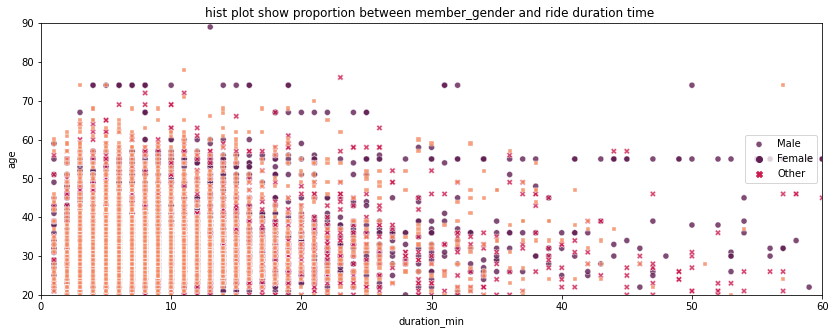

In [48]:
plt.gcf().set_size_inches(14,5)
ax=sb.scatterplot(x='duration_min',y='age',data=sexgroup,hue='member_gender',palette='rocket',alpha=0.8,x_jitter=0.3,y_jitter=0.4,style='member_gender');
ax.legend(loc=5,labels=['Male','Female','Other'])
ax.set_ylim(20,90)
ax.set_xlim(0,60)

ax.set_title("hist plot show proportion between member_gender and ride duration time ")

### most of trips under one hour Male , female and Other all could finish their trip no difference 
### gender does not affect again on duration under one hour 

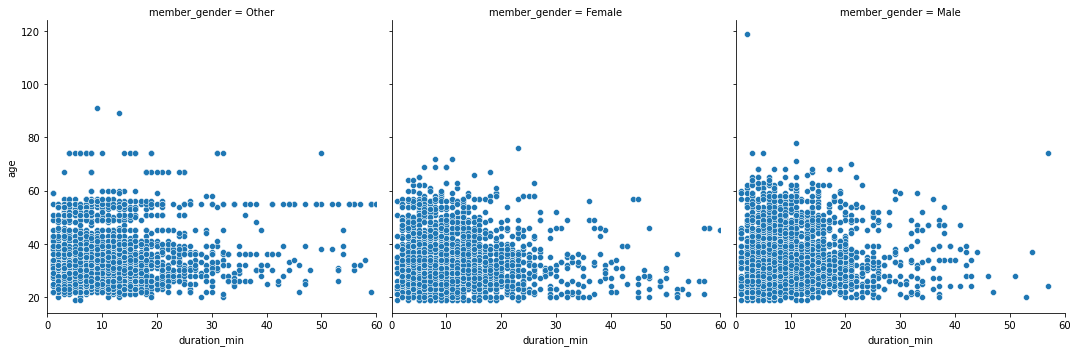

In [49]:
ax=sb.FacetGrid(data=sexgroup,col='member_gender',height=5)
ax.map(sb.scatterplot,'duration_min','age')
ax.set(xlim=(0, 60))


## geneder does not affect on duration time 

# <div id="q10"> Q10 )  The top highest days making bike trips </div>

In [50]:
df.head(3)

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,year,day,age
0,869,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,2019,28,35
2,1030,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,2019,28,47
3,608,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,2019,28,30


In [51]:
g2 = df.groupby( "day")['member_gender','day'].count()
#g2.groups.keys()

<ipython-input-51-6290aae7fe1a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g2 = df.groupby( "day")['member_gender','day'].count()


In [52]:
g2.head()
g2.rename(columns={'day':'sday'},inplace=True)

In [53]:
g2.head()

,member_gender,sday
day,,
1,5827,5827
2,3003,3003
3,2709,2709
4,5273,5273
5,8136,8136


In [54]:
g2.shape

(28, 2)

Text(0.5, 1.0, 'point plots shows number of trips  per day  ')

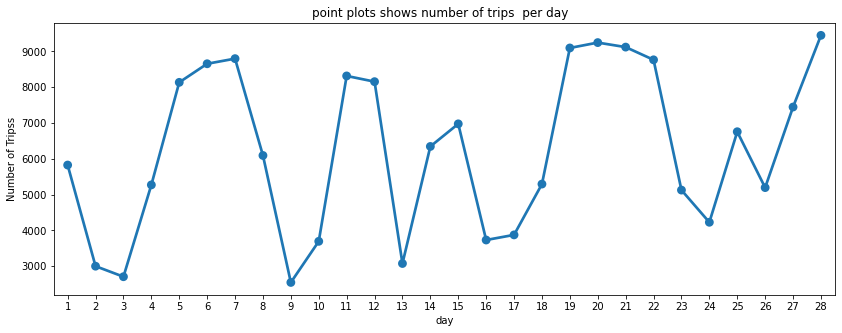

In [55]:
plt.gcf().set_size_inches(14,5)
ax=sb.pointplot(data=g2,x=g2.index,y='sday')
ax.set_ylabel("Number of Tripss")
ax.set_title("point plots shows number of trips  per day  ")

### we notice that days 5,6,7,19,20,21,22,28 is most doing days for trips

Text(0.5, 1.0, 'Bar plot shows values of nom of trips per day')

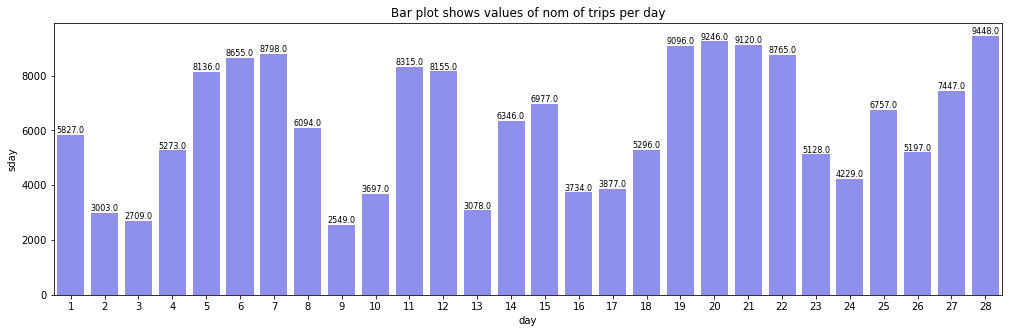

In [57]:
plt.gcf().set_size_inches(17,5)
ax=sb.barplot(data=g2,x=g2.index,y='sday',color='blue',alpha=0.5)
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),color="black", ha="center", va ='bottom',fontsize=8)
ax.set_title("Bar plot shows values of nom of trips per day")


## <div id="q11"> Q11) what is most important and used stations ?</div>

In [58]:
df.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,year,day,age
0,869,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,2019,28,35
2,1030,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,2019,28,47
3,608,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,2019,28,30
4,26,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,Subscriber,1974,Male,2019,28,45
5,29,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,Subscriber,1959,Male,2019,28,60


In [59]:
print(df.start_station_id.nunique())
# we have 329 stations 


329


In [60]:
df.head(2)

,duration_min,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,year,day,age
0,869,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,2019,28,35
2,1030,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,2019,28,47


In [61]:
g_start=pd.DataFrame()
g_end=pd.DataFrame()
g_start['start']=df['start_station_name'].value_counts().head()
g_start['start']

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
Name: start, dtype: int64

In [62]:
g_end['end']=df['end_station_name'].value_counts().head()
g_end['end']

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Name: end, dtype: int64

Text(0.5, 1.0, 'Horzointal bar plots show most station used to end trip ')

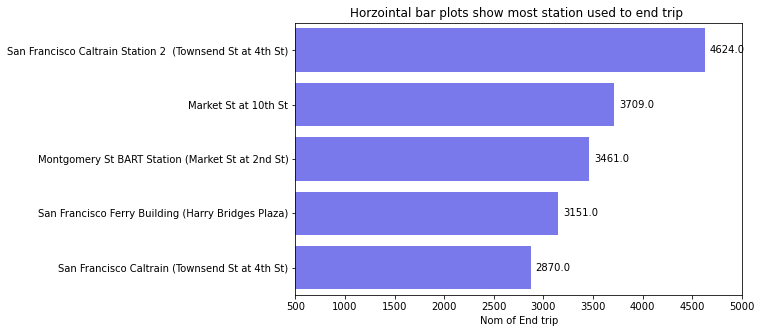

In [81]:
plt.gcf().set_size_inches(8,5)
ax=sb.barplot(x=g_end.end,y=g_end.index,color='blue',alpha=0.6);
for p in ax.patches:
    ax.annotate( p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),xytext=(5, 0), textcoords='offset points', ha="left", va="center")
ax.set_xlim(500,5000)
ax.set_xlabel("Nom of End trip")
ax.set_title("Horzointal bar plots show most station used to end trip ")

### we note that San Francisco Caltrain Station 2 most station used to end their trip , it must be vital region would be in investment consideration and government  

Text(0.5, 1.0, 'Horzointal bar plots show most station used to start trip ')

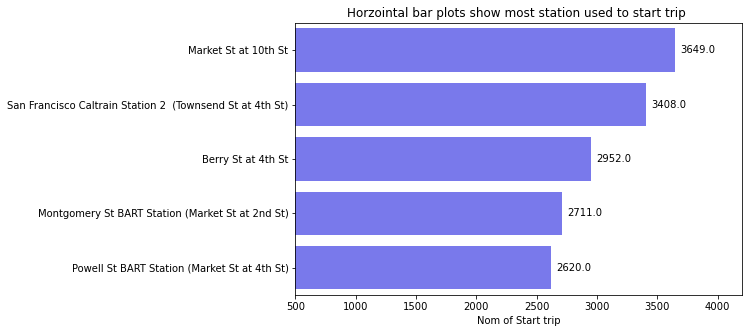

In [80]:
plt.gcf().set_size_inches(8,5)
ax=sb.barplot(x=g_start.start,y=g_start.index,color='blue',alpha=0.6);
for p in ax.patches:
    ax.annotate( p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),xytext=(5, 0), textcoords='offset points', ha="left", va="center")
ax.set_xlim(500,4200)
ax.set_xlabel("Nom of Start trip")
ax.set_title("Horzointal bar plots show most station used to start trip ")


### Market St at 10th St is most station used to start trip it's A vital region , and preferred to start project that help bike riders their . 

### San Francisco Caltrain Station 2 and Market St at 10th St , government must take care about road quality between route this stations  

# <div id="summary"> `Summary` </div>
* ### the most using bike riding is Male about 74% of all clients
* ### about 24 female  % 
* ### customers less tahn `10%` of all cilents and subscribers about `90%`
* ### most subscribers  are Male then female 
* ### all people prefers short trip under one hour 
* ### all pepole could do short trip but long trip most doing are youth from 20 to 40 years 
* ### `gender` and `age` doesn't have big effect on short trips 
* ### most busy days is  5,6,7,19,20,21,22,28 in the month
* ### stations `San Francisco Caltrain Station 2` and `Market St at 10th St` are Most important station to start or end trip  
* ### notice about Dataset  : it has many  outliers 